In [5]:
from scipy import stats
import pandas  as  pd
import seaborn as sns

iris = sns.load_dataset('iris')

print(iris.isnull().sum())

iris.tail()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


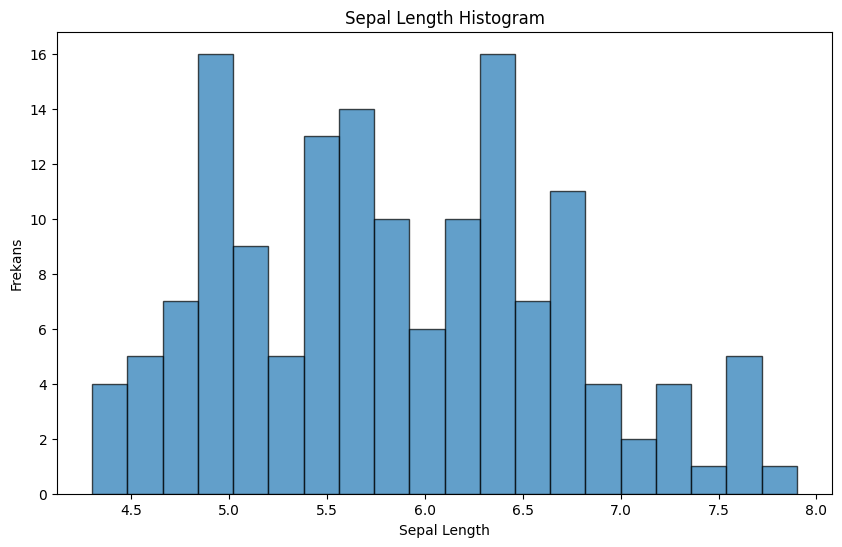

In [8]:
import matplotlib.pyplot as plt

#segal length Histogram
plt.figure(figsize =  (10,6))
plt.hist(iris['sepal_length'], bins = 20, edgecolor = 'k', alpha  = 0.7)
plt.title('Sepal Length Histogram')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.show()

C:\Users\Baki Akgun\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Baki Akgun\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Baki Akgun\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Baki Akgun\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

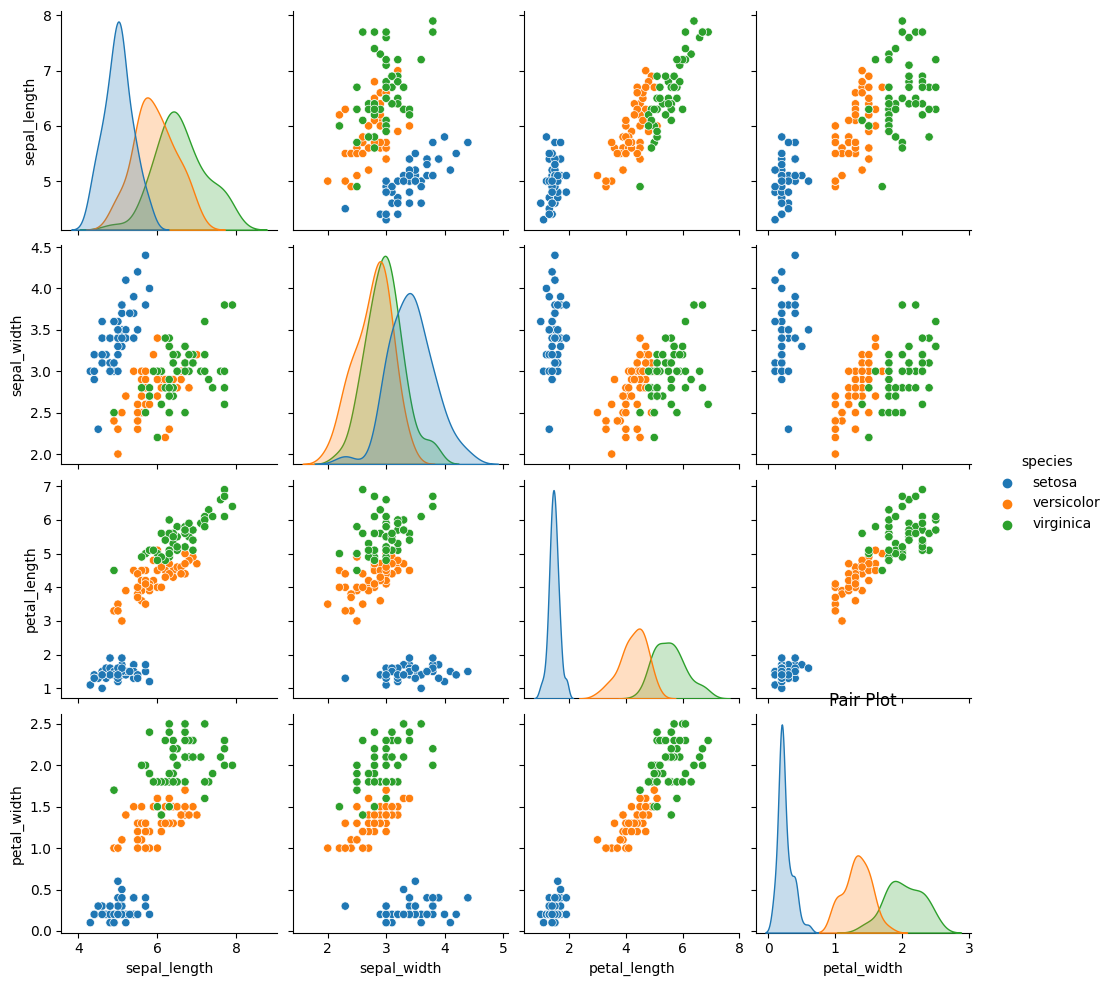

In [12]:
sns.pairplot(iris, hue='species')
plt.title('Pair Plot')
plt.show()

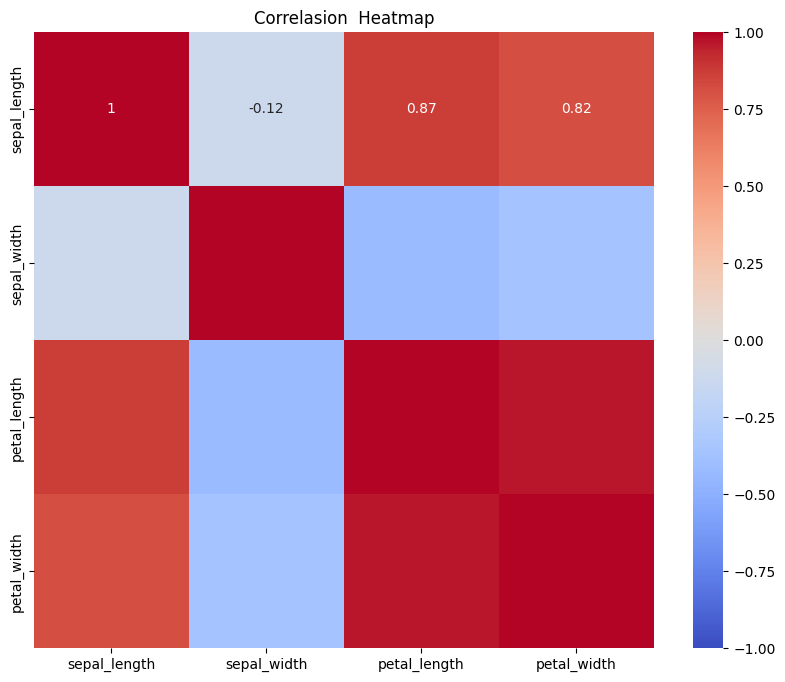

In [15]:
plt.figure(figsize =(10,8))
corr_matrix = iris.drop(columns = 'species').corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin = -1, vmax=1)
plt.title('Correlasion  Heatmap')
plt.show()

In [16]:
## Hypotes Tests

In [22]:
#Normalize Test

#Shapirio-Wilk Test

p_value = stats.shapiro(iris['sepal_length'])
print(f"Shapiro-Wilk Test p-value: {p_value}")

Shapiro-Wilk Test p-value: ShapiroResult(statistic=0.9760899543762207, pvalue=0.01018026564270258)


In [23]:
#D'Agostino's K^2  Test
p_value= stats.normaltest(iris['sepal_length'])
print(f"D'Agostino's K^2 Test: {p_value}")

D'Agostino's K^2 Test: NormaltestResult(statistic=5.735584236235733, pvalue=0.05682424941067306)


In [24]:
#Anderson-Daarling 
result = stats.anderson(iris['sepal_length'])
print(f"Anderson-Darling Test: {result}")

#We can't see normal Distrubution when examine p_values

Anderson-Darling Test: AndersonResult(statistic=0.8891994860134105, critical_values=array([0.562, 0.64 , 0.767, 0.895, 1.065]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=5.843333333333334, scale=0.8280661279778629)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


In [26]:
# ANOVA Test
import statsmodels.api as sm
from statsmodels.formula.api import ols

model=ols('sepal_length ~ species', data= iris).fit()
anova_table =  sm.stats.anova_lm(model, typ=2)
print(anova_table)



             sum_sq     df           F        PR(>F)
species   63.212133    2.0  119.264502  1.669669e-31
Residual  38.956200  147.0         NaN           NaN


In [27]:
# T-Test(2 group mean differance)
# split data two different groups
setosa = iris[iris['species'] == 'setosa']['sepal_length']
versicolor= iris[iris['species'] == 'versicolor']['sepal_length']

# t-test

t_stat, p_value = stats.ttest_ind(setosa, versicolor)
print(f"t-Test p_value: {p_value}")


t-Test p_value: 8.985235037487079e-18


In [28]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
Result: we cannot say about something normal distubution for İris Dataset
because p_values are less 0.05 value.
Annova and t-Test results say two column  